# Alpaca Demo

In [12]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from datetime import datetime


%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [6]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-05", tz="America/New_York").isoformat()

In [7]:
# Set the tickers
tickers = ["FB", "TWTR"]

In [8]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [9]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

FB                                        TWTR  \
                            open     high       low   close    volume   open   
time                                                                           
2020-10-05 00:00:00-04:00  262.2  264.865  260.8401  264.65  11134757  46.46   

                                                           
                             high    low  close    volume  
time                                                       
2020-10-05 00:00:00-04:00  47.495  46.12  47.31  18452270

In [14]:
from datetime import datetime
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2019-07-14", tz="America/New_York").isoformat()
end = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()

In [15]:
end

'2020-10-05T20:13:44.877356-04:00'

In [16]:
# Get closing prices for FB and TWTR from the last year
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
df_portfolio_year.head(10)

FB                                        \
                             open      high       low   close    volume   
time                                                                      
2019-07-15 00:00:00-04:00  204.25  205.3300  201.8200  203.93  14535697   
2019-07-16 00:00:00-04:00  203.89  205.4707  203.1000  203.84  11166309   
2019-07-17 00:00:00-04:00  204.18  204.3600  201.5900  201.82  10611530   
2019-07-18 00:00:00-04:00  200.15  202.4700  199.3800  200.77  10174234   
2019-07-19 00:00:00-04:00  202.18  202.3300  198.0700  198.37  10173742   
2019-07-22 00:00:00-04:00  199.87  202.5700  198.8100  202.30  12053884   
2019-07-23 00:00:00-04:00  202.84  204.2420  200.9625  202.39  13145395   
2019-07-24 00:00:00-04:00  197.63  204.8100  197.2200  204.65  22221694   
2019-07-25 00:00:00-04:00  206.70  208.6600  198.2600  200.69  36432956   
2019-07-26 00:00:00-04:00  200.19  202.8800  196.2500  199.58  21614871   

                            TWTR                                      
                            open    high      low    close    volume  
time                                                                  
2019-07-15 00:00:00-04:00  38.00  38.970  37.9435  38.6900  11258081  
2019-07-16 00:00:00-04:00  38.78  38.790  37.8200  38.0100   9311635  
2019-07-17 00:00:00-04:00  37.86  38.230  37.5600  37.7087   7147682  
2019-07-18 00:00:00-04:00  37.39  37.795  37.0000  37.6800   9449129  
2019-07-19 00:00:00-04:00  37.96  38.090  36.7300  36.7700   9134941  
2019-07-22 00:00:00-04:00  36.92  37.690  36.8300  37.5800   7602555  
2019-07-23 00:00:00-04:00  37.87  38.020  36.8200  37.8950   9164443  
2019-07-24 00:00:00-04:00  38.00  38.800  37.7600  38.7400  10956259  
2019-07-25 00:00:00-04:00  39.00  39.230  37.9100  38.1100  18468672  
2019-07-26 00:00:00-04:00  40.07  42.330  40.0000  41.5300  48883208

In [17]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["FB"] = df_portfolio_year["FB"]["close"]
df_closing_prices["TWTR"] = df_portfolio_year["TWTR"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head(10)

,FB,TWTR
2019-07-15,203.93,38.6900
2019-07-16,203.84,38.0100
2019-07-17,201.82,37.7087
2019-07-18,200.77,37.6800
2019-07-19,198.37,36.7700
2019-07-22,202.30,37.5800
2019-07-23,202.39,37.8950
2019-07-24,204.65,38.7400
2019-07-25,200.69,38.1100
2019-07-26,199.58,41.5300


In [19]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head()

,FB,TWTR
2019-07-16,-0.000441,-0.017576
2019-07-17,-0.009910,-0.007927
2019-07-18,-0.005203,-0.000761
2019-07-19,-0.011954,-0.024151
2019-07-22,0.019811,0.022029


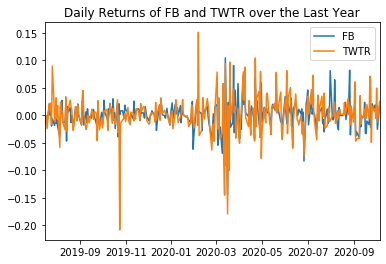

In [20]:
# Plot daily returns
df_daily_returns.plot(title="Daily Returns of FB and TWTR over the Last Year")

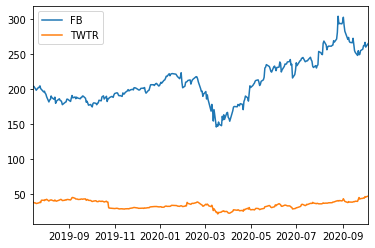

In [21]:
df_closing_prices.plot()